1. NOTEBOOK SETUP

In [1]:
!pip install nltk spacy emoji --quiet
import nltk
import re
import string 
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [2]:

nltk.download("punkt") #This downloads the punkt tokenizer
nltk.download("punkt_tab")
nltk.download("stopwords") #This help me download the English "common" words
nltk.download("wordnet")   #This helps me download Lemmatizer to bring word to base form
nlp = spacy.load("en_core_web_sm")  #This helps me load the Englush version of Spacy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\WAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2. TEXT NORMALIZATION AND TOKENIZATION

Here i am going to write a function for this for re-usability

In [3]:
def normalization_tokenization(text):
    text = text.lower()       #Brings text back to lowercasing
    text = text.strip()       #Remove extra spaces
    tokens = word_tokenize(text)   #Breaks texts into their word fragments
    return tokens

usage = "Hello!!! My name is Boluwaji, and i am trying to BUILD MAMA, a caregiver assistant for kids, sleeps, worked, ate, danced, kissed"
tokens = normalization_tokenization(usage)
print(tokens)


['hello', '!', '!', '!', 'my', 'name', 'is', 'boluwaji', ',', 'and', 'i', 'am', 'trying', 'to', 'build', 'mama', ',', 'a', 'caregiver', 'assistant', 'for', 'kids', ',', 'sleeps', ',', 'worked', ',', 'ate', ',', 'danced', ',', 'kissed']


3. NOISE REMOVAL

Removing of Punctuation
Removing of Noise like hmm, uhmm (Although this would be handled later using custom noise)

In [4]:
def removing_noise(tokens):
    cleaned_tokens = []
    for token in tokens:
        #Removing punctuation and emoji
        token = re.sub(r'[^\w\s]', '', token) #removing punctuation here
        token = emoji.replace_emoji(token, replace ='')   #removing emoji
        

        if token.strip() != "":
            cleaned_tokens.append(token)

    return cleaned_tokens


noisy_tokens = removing_noise(tokens)
print("I have just cleaned the noise:", noisy_tokens)

#r' means expect raw string
#^ means match anything else but the following :
#\w means any "word character" (letters a-z, A-Z, numbers 0-9, and underscores _
#\s means any "whitespace character" (spaces, tabs, etc.)
#Altogther  [^\w\s] means: "Match any character that is not a letter, number, underscore, or whitespace.







I have just cleaned the noise: ['hello', 'my', 'name', 'is', 'boluwaji', 'and', 'i', 'am', 'trying', 'to', 'build', 'mama', 'a', 'caregiver', 'assistant', 'for', 'kids', 'sleeps', 'worked', 'ate', 'danced', 'kissed']


4. STOPWORD REMOVAL

In [5]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words("english"))
    
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens


filtered = remove_stopwords(noisy_tokens)
print("After Stopword Removal:", filtered)

After Stopword Removal: ['hello', 'name', 'boluwaji', 'trying', 'build', 'mama', 'caregiver', 'assistant', 'kids', 'sleeps', 'worked', 'ate', 'danced', 'kissed']


5. LEMMATIZATION

In [6]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized

lemmas = lemmatize_tokens(filtered)
print("This is the lemmatized input:", lemmas)

This is the lemmatized input: ['hello', 'name', 'boluwaji', 'trying', 'build', 'mama', 'caregiver', 'assistant', 'kid', 'sleep', 'worked', 'ate', 'danced', 'kissed']


In [7]:

def normalize_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove excess whitespace
    text = text.strip()
    
    # Optionally: expand contractions later
    
    return text


In [8]:


def tokenize(text):
    return word_tokenize(text)


In [9]:


def remove_noise(tokens):
    cleaned = []
    for token in tokens:
        # Remove punctuation, unless it's an emoji or symbol
        if token not in string.punctuation and not token.isdigit():
            cleaned.append(token)
    return cleaned


6. PREPROCESSING PIPELINE

In [10]:
def preprocess_text(text, remove_stopwords=False):
    # Normalize
    text = normalize_text(text)

    # Tokenize
    tokens = tokenize(text)

    # Remove noise (punctuation etc., emojis retained)
    clean_tokens = remove_noise(tokens)


    # Lemmatize
    lemmatized_tokens = lemmatize_tokens(filtered)

    return lemmatized_tokens

# Example test
sample_input = "I am running to the playground!"
output = preprocess_text(sample_input)
print("Preprocessed Output:", output)


Preprocessed Output: ['hello', 'name', 'boluwaji', 'trying', 'build', 'mama', 'caregiver', 'assistant', 'kid', 'sleep', 'worked', 'ate', 'danced', 'kissed']


7. CREATING MAMA MINI DATASET AND THEN SAVING IT UP


This dataset includes unique sentences (Toddlers 2-3 years old, Preschoolers  4-5 years old, Early School Age 6-8 years old) with one-word intent labels, capturing a wide range of typical speech patterns and emotional or motivational contexts for each age group. The examples reflect developmental differences in language complexity and intent, from basic needs and observations in toddlers to more complex emotions and aspirations in older children.



In [22]:
# I am going to write a few dataset i csn think of at the moment and then write the rest later
data = {
    "phrase" : [
        "I want juice!", "More play!", "Give me that!", "Carry me!", "Hug now!",
        "No! I’m sad!", "I feel yucky!", "Scared!", "So happy!", "I don’t like!",
        "Doggy big!", "Sky is pretty!", "Kitty soft!", "Baby tiny!", "Daddy tall!",
        "Go away!", "Stop it!", "Come here!", "Put down!", "Don't do that!",
        "Where mama?", "Why dark?", "Who that?", "What’s that noise?", "Is it mine?",
        "Wow!", "Uh-oh!", "Yay!", "Ouch!", "Ew!",
        "I’m hungry!", "Sleepy now!", "Too cold!", "Hot!", "I want blanket!",
        "Vroom vroom!", "Roar!", "Meow!", "Beep beep!", "Ding dong!", "No mine", "Mommy up", "my ball",
        "I don't want to do my homework", "Can we go to the park", "My friend said i am not good at soccer",
        "Look at my new backpack", "Can i have a cookie, please", "Why is the sky blue", " i drew a big dinosaur",
        "He took my ball", "Me want juice", "Hug me", "No nap time", "Puppy soft", "i fall down", "More milk, please",
        "Don't touch it", "Where daddy go ?", "I want blankie", "Can we play outside", "Why do birds fly", "I built a tall tower",
        "She pushed me", "I want to wear my cape", "is it snack time", "Look, i found a bug!", "I don't like peas", "I finishes my puzzle",
        "Can i have a sleepover", "He laughed at my drawing",  "I want to be goalie", "Why is math so hard", "check out my new shoes",
        "Can you help with my project", "I am scared of the dark", "I want my teddy", "Where’s my shoe ?", "No, my turn!",
        "Daddy, carry me", "More cookies", "Doggy run fast", "I don't want bath", "Kiss it better", "Where kitty go?", 
        "Gimme that", "I hungry", "Nog go bed", "Look! big truck", "My cup fall", "Want to swing", "Mommy, come here!", 
        "It is too loud", "I see moon", "No share toy", "up up up!!!", "Can i have ice cream", "Why do stars shine", 
        "I made a castle", "He broke my crayon",  "I want my red shirt", "It is time for cartoons", "I don't like broccoli", 
        "Can we get a puppy?", "Why is it raining", "I jumped so high", "She won't play with me", "I found a shiny rock",
        "Can i help you cook?", "I want to be a superhero", "Why is fire hot?", "My block tower fell", "Let's play hide and seek",
        "I don't want to clean up", "That's my favourite book", "Can i have a turn", "Why do fish swim?", "I drew  rainbow",
        "He is being mean", "I want to go fast", "I got an A on my test!", "Can we go to the zoo?", "She said my hair looks weird", 
        "I want to join the soccer team", "Why is science so boring", "Look at my new bike", "Can you help with my spelling?",
        "I am nervous about the play", "I built a cool robot", "I want to be an astronaut", "Why do we have homework?", 
        "Check out my new game", "I am scared of thunder", "Can we bake cookies?", "My team won the game", "Why is the moon round?",
        "She didn't pick me for the team", "I learned to tie my shoes", "I don't want to read this book", "Can i try skateboarding", 
        "He called me a name", "I found a shell at the beach",  "Can you fix my toy?", "I am worried about my Dog", "I drew a picture for you",
        "Why can't i stay up late?", "I want to learn guitar", "My project didn't work right", "I want my bottle", "Where is my ball?",
        "No, my truck", "Mummy, hold me!", "More crackers","Kitty so soft", "No brush hair", "Kiss my boo-boo", "Gimme that spoon",
        "I thirsty", "No go potty", "Look, big bird!", "My block fell", "Want to slide", "Daddy, come now", "I see butterfly",
        "Want to kick ball!", "My sock wet!", "Look at fish!", "I want my duck!", "Too bright light!", "Mommy, sing song!",
        "I see rain!", "No give that!", "Where’s my cup?", "Want to dance", "My nose runny", "Look! Fast car", "No go inside",
        "Daddy, up high", "I want my pillow", "No eat yucky", "See funny clown", "I want to draw", "Too cold hands",
        "Play song please", "No take my doll!", "Where’s my chair?", "I want apple", "My toy gone!", "Mommy, look me",
        "No wear shoes", "Want more bubbles", "I see big tree", "Oucch, it hurts", "Push me swing", "No go car", 
        "I want hug", "See red balloon", "My cup empty", "Want to jump", "No clean up", "I sleepy", "Look, shiny star", 
        "Daddy, tickle me", "No share blocks","Too hot soup", "Play with me", "See big dog", "No put jacket", 
        "I want juice now", "My shoe off", "No eat carrots", "I want banana", "I want my hat", "Where is my bear", "No, my chair!", "More grapes", 
        "Bird fly high", "No wash face", "Fix my toy", "Where is my spoon", "Gimme my book", "I cold", "No p[ut socks", 
        "See big plane", "My juice spill", "Want to climb", "Mommy stay here", "Too wet towel", "I see cloud", "Not take my cup",
        "Swing me, please", "I want crackers", "Where is my coat", "Mine, dont touch", "No eat beans", "Look fast train",  
        "My hand dirty", "Want to splash", "Where is my ducky", "I want milk now", "No go stroller", "See pretty flower", 
        "I drop my spoon", "Play ball with me", "Too sticky hands", "I want my doll", "Where is my blanket", 
        "No share my bear", "Mommy spin me", "Look tall tower", "I tired", "No pick my toys", "Want to hop", 
        "My shirt wet", "See blue car", "I want kiss", "Where is my bib", "No sit down", "Push me daddy",
        "Ouch my knee", "I see big boat", "Want more raisins", "No wear hat", "Mommy watch me", "My toy suck", 
        "I want pear", "Where is my puzzle", "No give my ball", "Sing me song", "Too cold floor", "I want to paint", 
        "See funny duck", "No eat spinach", "Where is my glove", "I want my bunny", "Daddy lift me", "No go outside", 
        "Look at stars", "My nose itchy", "Want to build", "Where is my plate", "No take my truck", "I see squirell", 
        "Mommy read book", "Too dark room", "I want my blocks", "No brush teeth", "Look red kite", "My pants tight", 
        "Want to chase", "Want my juice", "Hug me, Mommy", "I scared dark", "Read book, please", "I sad, toy broke", 
        "Gimme my ball", "Ouchh it hurts", "Sing song now", "I happy bubbles", "Up, up Daddy", "My tummy yucky",
        "I love kitty", "Play with me", "Get my teddy", "My hand cold", "I am scared of thunder", "Can we play outside", 
        "I am so happy today", "Can you read a story", "I am mad he took it", "Can i pet the dog", "I feel so sad now", 
        "Can  i have more juice", "Can we make a fort", "I am excited for cake", "I love my new toy", "can i draw with crayons", 
        "I am angry at her", "Can we sing a song", "can i help you cook", "I feel so tired", "can we go to the park", 
        "I am nervous about school", "Can i have a snack", "I am so excited today", "Can you help me with homework", 
        "I am upset he cheated", "Can i play my game", "I am scared of that noise", "Can i call my friend", 
        "I am happy we won", "Can you fix my bike", "I feel sad she is gone", "Can i try skateboarding", 
        "I am angry at my brother", "Can we bake cookies", "I am worried about my test", "Can i join the club", 
        "I love my new book", "Big dog run", "Gimme my cup", "See red balloon", "Push me swing", "Kitty so soft",
        "Get my toy", "Moon is bright", "Open the door", "Bird fly high", "Give me juice", "Truck go fast", 
        "Turn on light", "Pick me up", "Rain fall down", "Find my shoe", "Big tree tall", "Play song now", 
        "Bug crawl slow", "Fix my block", "The skyb is blue", "Read me a book", "A butterfly landed",
        "Tie my shoe", "The cloud is fluffy", "Give me a snack", "The dog is barking", "Push me higher",
        "Flowers smell nice", "Draw with me", "The sun is shiny", "Open my bag", "Ants march in line",
        "Get my crayons", "The moon is big", "Turn off light", "The stars are twinkling", "Help me with homework",
        "The car is so fast", "Pass me the ball", "Clouds look like animals", "Bring my water", "The leaves are falling", 
        "Fix my kite",  "The river is sparkling", "Show me the game", "Clean my shoes", "The playground is crowded",
        "That tree is huge", "Start the movie", "The rainbow is bright", "Find my Pencil", "Birds are flying high",
        "Play catch with me", "The wind is strong", "Open the window", "Where my teddy", "Wow, big truck",
        "What is that noise", "Yuck, it is sticky", "Where is my juice", "Ohh shiny light", "Who is that man",
        "Cold brr", "Where doggy go", "Yay, bubbles", "What is in there", "Ohhh, it hurts", "Where is my ball",
        "Fun, spin fast", "Why kitty run", "Eww stinky", "Cool, big plane", "What is that smell", "Whooa so high",
        "Why is sky blue", "Wow, that is so cool", "Why do birds sleep", "What is that bug doing", "Ohh, pretty rainbow",
        "Why is it raining", "Eek, it is too loud", "Where is my backpack", "Yay, i won", "What time is lunch", 
        "Oww, that is hot", "Why do dogs bark", "Wow, sao sparkly", "Where is my favourite book", "Brr it is freezing", 
        "What is in the box", "Cool, fast car", "Why is grass green", "Whooa big wave", "Why do stars twinkle", "Awesome, new game",
        "Where does rain comes from", "What is inside a cloud", "Wow, that is huge", "Why do cats purr", "Yikes, so loud",
        "Where is my soccer ball", "Sweet, i did it", "What makes thunder", "Ouchh, it is sharp", "Why is the moon round", 
        "Cool, shiny rock", "Where do fish sleep", "Ewww, bad smell", "What is that machine do", "Whoa, so fast",
        "Why do leaves fall", "Yay, fireworks", "I want my blankie", "Vroom, car go", "I thirsty", "Meow like kitty", 
        "Need my teddy", "Woof woof dog", "Need my teddy", "I hungry now", "Beep beep truck", "Want my cup", 
        "Rawr i am dinosaur", "I sleepy", "Choo choo train", "Baa baa sheep", "I want milk", "Zoom plane fly",  
        "Need my hat", "Moo like cow", "I cold", "Pow pow superhero", "I need a snack", "I am a pirate",
        "I want my jacket", "Roar i am lion", "I need my crayons", "Honk honk like a car", "I am so thirsty", 
        "Meow, i am a cat", "I need my book", "Woof woof, i am a puppy", "I want my pillow", "Tweet tweet like a bird", 
        "I need a hug", "Vroom i am a rocket", "I want my ball", "Oink oink pig time", "I am really hungry", "Chug chug like a train", 
        "I need my socks", "Rawr like a dragon", "I need my pencil", "I am a robot beep boop", "I want some water", 
        "Roar i am T-Rex", "I need my backpack", "Pow, like a superhero", " I am really tired", "Arf arf i am a dog", 
        "I need my lunch", "Zoom zoom i am a racecar", "I want my jacket", "Meow meow like a kitten", 
        "I need my homework", "Hoot hoot i am an owl", "I am super hungry", "Vroom, i am a jet plane", 
        "I need my shoes", "Rawr, i am a monster", "I want a blanket", "Clop clop like a horse", "I want my bottle",  
        "Brr i am a plane", "Quack like a duck", "Toot toot i am a boat", "Want my teddy bear", "Grr, i am a bear",
        "Grr, i am a king kong", "Cluck cluck i am a hen", "Woof like a puppy", "I am cold now", "Rawr i am a tiger", 
        "Hiss like a snake",  "Bang bang like drum", "I need my water", "I want my coat", "Beep beep like a robot", 
        "Chirp chirp like a bird", "Need my stuffed animal", "Vroom i am a motorcycle", "I want a snack", "Meow meow", 
        "Caw caw", "I need my ruler", "Clang clang", "No dog", "More cookie", "I dont like monkey", "Can we go to the zoo",
        "You hurt me", "Can i have bike", "More book", "My bike is broken", "Can i have doll", "Me do it", "I dont like teddy", 
        "I feel sad", "Thats my game", "Mama help", "Where juice", "My game is broken", "More book", "Me do it", "It is not fair",
        "Can we go to the school", "I feel sad", "My tablet is broken", "I think thats weird", "i feel sad", "Where cookie", 
        "I think thats strange", "No cookie", "I saw a cat today", "Mama help", "My puzzle is broken", "Bird go", "I want to be a scientist",
        "I want to be a doctor", "I want to be a police", "I dont like sandwich", "I know how to build", "I know thats cool",
        "Me do it", "Car mine", "I sad", "I dont like bike", "I saw a bird", "Where cookie", "I saw a cat today", 
        "I am really tired today", "I know how to code", "I know how to play", "I know how to do it", "Can i have a doll",
        "No book", "Car mine", "Toy mine", "Mine", "Why is it loud", "I dont like teddy", "I want to run", "Me do it", 
        "It is not fair", "I feel excited", "No juice", "I want juice", "I know how to build", "I think thats awesome",  
        "Dog mine", "That made me nervous", "I know to swim", "Look at my drawing", "I want to be a teacher", 
        "I want ball", "block mine", "Mine", "You hurt me", "Look at my bike", "No milk", "Can i have a doll", 
        "I sad", "I want car", "All gone block", "I want to read", "Why cant i build", "I am really nervous today", 
        "You hurt me", "I know how to climb", "My game is broken", "No dog", "Lets play teddy", "Can i have game",
        "All gone car", "Ball mine", "More juice", "I sad", "I want to be a detective", "Please stop it", 
        "Can we go to the library", "I feel angry", "I want to be a spiderman", "I want to be a superhero",
        "Look at my train", "Where milk", "I saw a bird today",  "Thats my sandwich", "I think thats strange",
        "I want to be a artist", "I dont like bird", "Why is it small", "I want to be a teacher", "Thats my name", 
        "All gone milk", "I dont like doll", "look at my doll", "I want dog", "I am really bored today", "I want to read", 
        "I think thats funny", "Why is it red", "I feel happy", "All gone juice", "I want to draw", "Lets play bike",
        "You hurt me", "I saw a bird today", "No ball", "More toy", "Thats my bird",  "Can we go to the Museum", 
        "Where block", "Look at my monkey", "My robot is broken", "Look at my crayon", "I want book",
        "I want my book", "Why cant i climb", "I want to jump", "Where dog", "I know how to paint", "Why cant i paint",
        "No ball", "Can i have a game", "Where car", "That made me bored", "I want cat",  "All gone cat", "No fit block", 
        "Ouch, my knee", "Cant open it", "My tummy hurts", "Toy not work", "Ohh, i fall",  "No want this", 
        "My finger stings", "Stuck no move", "Boo boo on hand", "Cant reach it", "My head hurts", "No go right", 
        "Ohh too hot", "Puzzle too hard", "My arm sore", "No button work", "Cant do it", "My nose itchy", "I cant tie my shoe",
        "My elbow hurts bad", "He pushed me", "My crayon broke again", "My feelings are sad", "I cant draw it right", 
        "My knee got scraped", "The toy wont work", "She was mean to me", "I keep messing up", "My hand got pinched", 
        "Cant get it open", "My tummy feels bad", "My tower block fell", "He took my toy, sad", "I cant find it", 
        "My finger got cut", "This game is too tricky", "My heart feels hurt", "I cant solve this Maths", "My ankle hurts bad", 
        "My project keeps failing", "She said i am not cool", "I cant spell this word", "I fell and srapped my knee", 
        "This game is too hard", "He laughed at my picture", "I keep losing the race", "My stomach really hurts", 
        "I cant get it right", "My wrist got twisted", "My homework is too tough", "They left me out", 
        "I cant open my locker", "I bumped my head hard", "Painful", "Headache", "ache", "This knot wont untie", 
        "My friend was mean", "I keep dropping the ball", "Sore", "Hurt", "cant zip coat", "oww, my toe hurts",
        "Toy wont move", "My arm got bumped", "No close box", "Ouch my finger", "Can’t stack blocks", "My cheek stings",
        "Lid stuck tight", "My tummy yucky", "No draw good", "Ohh, i hit head",  "Cant find toy", "My hand burns", 
        "My head burns", "Shoe too tight", "My nose hurts", "cant pull it", "ouch, my leg", "Now work right", 
        "My ear feels bad", "I cant put paper", "Bleeding", "My arm is bleeding", "My knee is bleeding",
        "My toy keeps breaking", "She yelled", "Cant button shirt", "My foot got stepped on", "The game is so hard", 
        "He ingored me", "I cant find my glove", "My hand’s all sore!", "My picture’s messy", "My elbow’s bruised", "Bruised",
        "Can’t climb that high!",  "They teased me", "My blocks won’t stay", "Toe", "finger", "My finger got jammed",
        "I can’t write name!", "My heart feels bad!", "This knot’s too hard!", "My arm hurts now", "I can’t read this word",
        "My wrist hurts bad!", "My drawing looks wrong!", "They didn’t pick me!", "Can’t finish this puzzle!", "I scraped my shin!",
        "This problem’s too tough!", "She called me names", "I keep missing shots", "My ankle is twisted", "Cant tie this knot",
        "My feelings got hurt", "I bumped my elbow", "I cant kick straight", "He left me out", "This book’s too hard!",
        "My head’s pounding!", "My friend was rude!", "I stack blocks high", "Want my milk", "I run so fast", "I need my blankie", 
        "Look i draw circle", "I am so hungry", "I climb slide", "Need my teddy", "I throw ball far", "I build big tower",
        "I jump high", "Look my picture", "I am really thirsty", "I sing loud", "I kick my ball", "I drew a big rainbow",
        "I need a snack", "I built a castle", "I am super thirsty", "I counted to ten", "Need my favorite book", 
        "I colored it perfect", "I jumped so far", "I wrote my name!", "I got an A on my test!", "I scored a goal",
        "I won the race", "I learned a new trick", "I need my notebook", "I drew a cool picture", "I spelled every word right",
        "I spelt every word right", "I want my lunch", "I want my breakfast", "I want my dinner", "I made a new friend", 
        "I need my eraser", "I rode my bike fast", "I want a blanket", "I happy bubbles", "No eat peas", "I scared dark",
        "No go bed", "I love kitty", "No wear shoes", "I sad, toy gone", "No brush hair", "I mad it broke", "No take bath",
        "I happy swing", "No clean up", "I scared loud noise", "No put jacket", "I love my teddy", "No share toy", 
        "I sad fall down", "No go potty", "I happy see dog", "No eat yucky", "I am so happy today", "I dont want brocolli", 
        "I am scared of thunder", "I wont clean my room", "I love my new toy", "No i wont share", "I am sad she left", 
        "I dont want a nap", "I am mad he took it", "I wont wear that", "I am excited for cake", "No i wont go", 
        "I feel shy now", "I dont like baths", "I am happy we played", "I wont eat carrots", "I am scared of bugs",
        "No i wont tidy", "I love my picture", "I dont want to", "I am so excited today", "I wont do my homework", 
        "I dont want to read", "I love my new bike", "I wont share my game", "I am sad my friend left", 
        "I dont like that food", "I am angry he cheated", "I wont clean up", "I am proud of my art",  
        "No i wont go there", "I am nervous for school", "I dont want to try", "I love my team", "I wont wear that shirt",
        "I am worried about tests", "I dont like that game", "I am happy we won", "I wont do chores", "I am happy see stars",
        "No put socks on", "I scared of dog", "I love my ball", "No go in car", "I sad cup broke", "No brush teeth", 
        "I mad toy suck", "No wear hat", "I happy jump high", "No clean toys", "I scared big noise", "No take nap", 
        "I love my bunny", "No share blocks", "I sad friend gone", "No eat beans", "I happy see bird", "No go inside",
        "No go", "No go outside", "I am excited for playtime", "I am scared of spiders", "I dont want a bath",  
        "I love my new shoes", "No i wont tidy up", "I am sad my balloon popped", "I dont like that shirt", 
        "I am angry she pushed", "I wont to go bed", "I am happy with my drawing", "No i wont share it", 
        "I feel shy at parties", "I dont want to go", "I am excited for the zoo", "I wont eat that soup", 
        "I love my big kite", "I dont like naps", "I am thrilled we won", "I wont do this math", "I am scared of heights",
        "I dont want to read", "I love my new game", "I wont share my book", "I am sad she moved away", 
        "I dont like that snack", "I am angry he broke it", "I wont clear my desk", "I am proud of my goal",
        "No i wont go there", "I am nervous for the play", "I dont want to write", "I love my cool project", 
        "I wont eat veggies", "I am worried about my dog", "I wont do this chore", "Hug me mommy", 
        "Look big balloon", "Kiss my boo-boo", "Wow fast car", "Hold me Daddy", "Yay! bubbles pop", 
        "Want my blankie", "See shiny star", "Cuddle me now", "Cool big dog", "Need my teddy", "Whoa tall slide", 
        "Rock me please", "Fun jump high", "Want my pillow", "Look red kite", "Stay with me", "Stay", 
        "Whoa bright light", "Sing song", "Sing me song", "Fun spin fast", "Need my cup", "Wow big boat", 
        "Pat me", "Pat my back", "Yay fun swing", "Can you hug me tight", "Can you hug me", "I need a kiss now", 
        "Wow a huge rainbow", "Can you hold my hand", "Yay i see fireworks", "I want my stuffed animal", 
        "Cool a fast rocket", "Sit with me", "Can you sit with me", "Whoa a big dinosaur", "I need my blanket", 
        "Fun i love slides", "Can you rock me", "Wow shiny balloons", "I want my teddy bears", "Yay a new toy", 
        "Can you sing to me", "Cool a fast train", "I need a big hug", "Hug me", "A tall tower", "Can you stay close",
        "Stay close", "I see a plane", "My pillow", "I am thrilled for the party", "Can you sit by me", "Wow an awesome bike",
        "Yay we won the game", "Can you hold my hand", "Cool a new robot", "Whoa a huge slide", 
        "Fun i love rockets", "Wow a bright firework", "Can you rub my back", "I want my hoodie", 
        "Can you stay close", "Wow a shiny trophy", "I need my soft toy", "Yay a big adventure", 
        "Can you pat my shoulder", "Whoa, a tall Ferris wheel!", "I want my cozy blanket", "Cool! a fun race"
    ],
    
    "intent" : [
        "request", "request", "request", "request", "request",
        "emotion", "emotion", "emotion", "emotion", "emotion",
        "observation", "observation", "observation", "observation", "observation",
        "command", "command", "command", "command", "command",
        "question", "question", "question", "question", "question",
        "reaction", "reaction", "reaction", "reaction", "reaction",
        "need", "need", "need", "need", "need",
        "imitation", "imitation", "imitation", "imitation", "imitation", "assertion", "attention", "need",
        "frustration", "Suggestion", "Distress", "Excitement", "Request", "inquiry", "pride", "complaint", "need",
        "Emotion", "Refusal", "observation", "Distress", "Request", "Reaction", "Question", "Need", "Suggestion",
        "Question", "Pride", "Complaint", "Desire", "Question", "Excitement", "Dislike", "Accomplishment", "Request", 
        "Hurt", "Desire", "frustration", "Excitement", "Assistance", "Fear", "Need", "Question", "Command", 
        "Comfort", "Need", "Observation", "Refusal", "Comfort", "Question", "Command", "Need", "Refusal", "Excitement", 
        "Distress", "Desire", "Attention", "Complaint", "Obvservation", "Possession", "Request", "Request", "Inquiry",
        "Pride", "frustration", "Desire", "Excitement", "Dislike", "Request", "Observation", "Pride", "Frustration",
        "Excitement", "Question", "Desire", "Observation", "Frustration", "Excitement", "Refusal", "Excitement", 
        "Request", "Observation", "Excitement", "Complaint", "Desire", "Excitement", "Question", "Hurt", "Desire",
        "Frustration", "Excitement", "Question", "Fear", "Pride",  "Desire", "Frustration", "Excitement", "Fear", 
        "Request", "Pride", "Observation", "Hurt", "Pride", "Refusal", "Request", "Complaint", "Excitement",
        "Request", "Complaint", "Pride", "Question", "Desire", "Frustration", "Need", "Need", "Possession",
        "Comfort", "Need", "Observation", "Refusal", "Comfort", "Command", "Need", "Refusal", "Excitement",
        "Distress", "Desire", "Emotion",  "Observation", "Desire", "Frustration", "Excitement", "Need", "Complaint",
        "Request", "Observation", "Possession", "Need", "Desire", "Distress", "Excitement", "Refusal", "Excitement",
        "Need", "Refusal", "Excitement", "Desire", "Distress", "Request", "Possession", "Need", "Desire", "Complaint",
        "Comfort", "Refusal", "Request", "Observation", "Distress", "Request", "Refusal", "Emotion", "Excitement",
        "Complaint", "Desire", "Refusal", "Need", "Excitement", "Request", "Possession", "Hurt", "Request",
        "Excitement", "Refusal", "Command", "Distress", "Refusal", "Desire", "Need", "Question", "Possession", "Need", 
        "Observation", "Refusal", "Request", "Request", "Command", "Intent", "Refusal", "Excitement", "Distress", 
        "Desire", "Attention", "Complaint", "Observation", "Possession", "Request", "Desire", "Question",
        "Possession", "Refusal", "Excitement", "Distress", "Desire", "Question", "Request", "Refusal", 
        "Obsevation", "Distress", "Request", "Complaint", "Need", "Question", "Possession", "Request", "Excitement", 
        "Distress", "Refusal", "Desire", "Distress", "Observation", "Emotion", "Question", "Refusal", "Request", 
        "Distress", "Observation", "Request", "Refusal", "Attention", "Distress", "Request", "Question", 
        "Possesion", "Affection", "Distress", "Desire", "Excitemenmt", "Refusal", "Question", "Need", "Affection",
        "Refusal", "Excitement", "Distress", "Desire", "Question", "Possession", "Observation", "Request", 
        "Complaint", "Need", "Refusal", "Excitement", "Distress", "Desire", "Request", "Emotion", "Emotion", "Request", "Emotion", 
        "Possession", "Distress", "Emotion", "Emotion", "Attention", "Emotion", "Emotion", "Attention", "Request", "Distress", 
        "Fear", "Request", "Excitement", "Request", "Complaint", "Request", "Emotion", "Need", "Request", "Excitement", 
        "Excitement", "Request", "Emotion", "Emotion", "Request", "Distress", "Request", "Emotion", "Need", "Excitement", 
        "Need", "Complaint", "Request", "Emotion", "Request", "Excitement", "Request", "Emotion", "Reqeust", "Emotion",
        "Request", "Distress", "Request", "Excitement", "Observation", "Command", "Observation", "Command", "Observation",
        "Command", "Observation", "Command", "Observation", "Command", "Observation", "Command", "Attention", "Observation", 
        "Need", "Observation", "Command", "Observation", "Command", "Observation", "Command", "Excitement", "Command", 
        "Observation", "Need", "Observation", "Command", "Observation", "Command", "Observation", "Command", "Observation", 
        "Command", "Observation", "Command", "Observation", "Need", "Observation", "Command", "Observation", "Need", 
        "Observation", "Command", "Observation", "Command", "Command", "Observation", "Observation", "Command", 
        "Excitement", "Need", "Observation", "Attention", "Observation", "Command", "Need", "Excitement", "Question",
        "Reaction", "Question", "Reaction", "Question", "Distress", "Question", "Excitement", "Question", "Distress",
        "Need", "Excitement", "Question", "Distress", "Observation", "Distress", "Observation",  "Question", "Excitement",
        "Question", "Question", "Excitement", "Question", "Distress", "Need", "Excitement", "Question", "Distress", 
        "Question", "Excitement", "Need", "Distress", "Question", "Excitement", "Question", "Excitement", "Question", 
        "Excitement", "Question", "Question", "Excitement", "Question", "Complaint", "Need", "Pride", "Question", 
        "Distress", "Question", "Observation", "Question", "Distress", "Question", "Excitement", "Question", 
        "Excitement", "Need", "Inmitation", "Need", "Imitation", "Need", "Imitation", "Need", "Need", "Imitation",
        "Need", "Imitation", "Need", "Imitation", "Imitation", "Need", "Imitation", "Need", "Imitation", "Distress", 
        "Imitation", "Need", "Imitation", "Need", "Imitation",  "Need", "Imitation", "Need", "Imitation",  "Need",
        "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", 
        "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", "Distress", "Imitation", 
        "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", "Need", "Imitation", 
        "Distress", "Imitation", "Need", "Imitation", "Imitation", "Imitation", "Need", "Imitation", "Imitation",
        "Imitation", "Imitation", "Distress", "Imitation", "Imitation", "Imitation", "Need", "Need", "Imitation",
        "Imitation", "Need", "Imitation", "Need", "Imitation", "Imitation", "Need", "Imitation", "Command", "Need", 
        "Distress", "Question", "Hurt", "Question", "Need", "Need", "Need", "Pride", "Distress", "Emotion", 
        "Possession",  "Need", "Question", "Hurt", "Need", "Pride", "Emotion", "Question", "Distress", "Hurt", 
        "Observation", "Emotion", "Question", "Observation", "Refusal", "Observation", "Distress", "Complaint",
        "Observation", "Desire", "Desire", "Desire", "Dislike", "Pride", "Excitement", "Pride", "Possession", 
        "Emotion", "Emotion", "Observation", "Question", "Observation",  "Distress", "Pride", "Pride", "Pride", 
        "Question", "Refusal", "Possession", "Possession", "Possession", "Distress", "Emotion", "Desire",
        "Pride", "Emotion", "Excitement", "Refusal", "Need", "Pride", "Excitement", "Possession", "Fear", 
        "Pride", "Attention", "Desire", "Need", "Possession", "Possession", "Hurt", "Attention", "Refusal",
        "Question", "Emotion", "Desire", "Complaint", "Desire", "Question", "Emotion", "Distress", "Pride",
        "Complaint", "Refusal", "Attention", "Question", "Complaint", "Possession", "Need", "Emotion", 
        "Desire", "Command", "Question", "Emotion", "Desire", "Desire", "Pride",  "Question", "Observation",
        "Possession", "Observation", "Desire", "Complaint", "Question", "Desire", "Possession", "Complaint",
        "Complaint", "Attention", "Desire", "Distress", "Need", "Excitement", "Observation", "Excitement",
        "Complaint", "Desire", "Attention", "Distress", "Observation", "Refusal", "Need", "Possession", 
        "Question", "Question", "Attention", "Complaint", "Attention", "Need", "Possession", "Question", 
        "Desire", "Question", "Pride", "Question", "Refusal", "Question", "Question", "Distress", "Desire", 
        "Complaint", "Frustration", "Distress", "Complaint", "Distress", "Complaint", "Distress",  "Refusal", 
        "Distress", "Distress", "Distress", "Complaint", "Distress", "Refusal", "Distress", "Complaint", 
        "Distress", "Complaint", "Refusal", "Distress", "Complaint", "Distress", "Distress", "Complaint", "Distress",
        "Distress", "Distress", "Complaint", "Complaint",  "Complaint", "Distress", "Complaint", "Distress", 
        "Complaint", "Complaint", "Complaint", "Distress", "Complaint", "Distress", "Need", "Distress", 
        "Complaint", "Complaint", "Need", "Distress", "Complaint", "Complaint", "Complaint",  "Distress",
        "Complaint", "Distress", "Complaint", "Complaint", "Complaint", "Distress", "Distress", "Distress", 
        "Distress", "Complaint", "Complaint", "Complaint",  "Distress", "Distress", "Complaint", "Distress",
        "Complaint", "Distress", "Refusal", "Distress", "Complaint", "Distress", "Complaint", "Distress", 
        "Complaint", "Distress", "Complaint", "Distress", "Distress", "Complaint", "Distress", "Complaint",
        "Distress", "Complaint", "Distress", "Complaint", "Distress", "Distress", "Distress", "Complaint", 
        "Complaint", "Complaint", "Distress", "Complaint", "Complaint", "Complaint", "Distress", "Complaint",
        "Distress", "Distress", "Complaint", " Complaint", "Complaint", "Distress", "Distress", "Distress",
        "Complaint", "Distress", "Complaint", "Distress",  "Complaint", "Distress", "Complaint", "Complaint",
        "Complaint", "Distress", "Complaint", "Complaint", "Complaint", "Distress", "Complaint", "Emotion", 
        "Distress", "Complaint", "Complaint", "Complaint", "Distress", "Complaint", "Pride", "Need", "Pride",
        "Need", "Pride", "Need", "Pride", "Need", "Pride", "Pride", "Pride", "Pride", "Need", "Pride", "Pride",
        "Pride", "Need", "Pride", "Need", "Pride", "Need", "Pride", "Pride", "Pride", "Pride", "Pride", "Pride", 
        "Pride", "Need", "Pride", "Pride", "Pride", "Need", "Need", "Need", "Pride", "Need", "Pride", "Distress",
        "Emotion", "Refusal", "Emotion", "Refusal", "Emotion", "Refusal", "Emotion", "Refusal", "Emotion", 
        "Refusal", "Emotion", "Refusal", "Distress", "Refusal", "Emotion", "Possession", "Distress", "Refusal",
        "Emotion", "Refusal", "Emotion", "Refusal", "Emotion", "Refusal", "Emotion", "Possession", "Emotion",
        "Refusal", "Complaint", "Refusal", "Excitement", "Refusal", "Emotion", "Dislike", "Excitement", 
        "Refusal", "Refusal", "Refusal", "Excitement", "Refusal", "Excitement", "Need", "Need", "Emotion", 
        "Possession", "Emotion", "Complaint", "Complaint", "Refusal", "Pride", "Refusal", "Need",
        "Refusal", "Emotion", "Refusal", "Distress",  "Complaint", "Emotion", "Emotion", "Emotion",
        "Refusal", "Emotion", "Possession", "Refusal", "Emotion",  "Refusal", "Emotion", "Refusal", "Pride",
        "Refusal", "Distress", "Refusal", "Emotion", "Possession", "Emotion", "Refusal", "Observation", 
        "Refusal", "Refusal", "Refusal", "Excitement", "Distress", "Refusal", "Possession", "Refusal",
        "Emotion", "Complaint", "Distress", "Refusal", "Pride", "Possession", "Emotion", "Refusal", 
        "Excitement", "Refusal", "Pride", "Complaint", "Pride", "Need", "Emotion", "Need", "Possession",
        "Possession", "Emotion", "Complaint", "Complaint", "Refusal", "Pride", "Refusal", "Emotion",
        "Refusal", "Pride", "Refusal", "Complaint", "Refusal", "Comfort", "Excitement", "Comfort", "Excitement",
        "Comfort", "Excitement", "Comfort", "Excitement", "Comfort", "Excitement", "Comfort", "Excitement", 
        "Comfort", "Excitement", "Comfort", "Excitement", "Comfort", "Comfort", "Excitement", "Comfort",
        "Excitement", "Comfort", "Comfort", "Comfort", "Excitement", "Comfort", "Comfort", "Excitement", 
        "Need", "Excitement", "Comfort", "Comfort", "Excitement", "Comfort", "Comfort", "Comfort", 
        "Excitement", "Comfort", "Excitement", "Comfort", "Excitement", "Comfort", "Comfort", "Excitement",
        "Comfort", "Excitement", "Comfort", "Comfort", "Excitement", "Comfort", "Comfort", "Excitement", 
        "Comfort", "Excitement", "Comfort", "Excitement", "Excitement", "Comfort", "Excitement", "Excitement", 
        "Excitement", "Excitement", "Comfort", "Comfort", "Comfort", "Excitement", "Comfort", 
        "Excitement", "Comfort", "Excitement", "Comfort", "Excitement"
        
    ]       
}
df = pd.DataFrame(data)   #Converting to dataframe here
df.to_csv("MAMA_EXPRESSIONS_AND_INTENT", index = False)   #Then saving it up into a csv file
print("File has been successfully saved")

File has been successfully saved


8. PREPARING DATA FOR MODELLING

In [14]:
df = pd.read_csv(r"C:\Users\WAJI\OneDrive\projects\MAMA\MAMA DATA\MAMA ALL DATA.csv")    #Loading my datasset
df["Statement"] = df["Statement"].str.lower()           #Turning phrases into lowercase
df['Statement'] = df['Statement'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))   #Remvoing punctuations
df["Intent"].value_counts()




Intent
Distress          581
Need              563
Pride             549
Complaint         548
Comfort           544
Observation       531
Emotion           530
Excitement        527
Imitation         517
Desire            512
Command           506
Possession        505
Attention         494
Refusal           488
Question          462
Gratitude         327
Request            18
Hurt                8
need                7
Frustration         7
observation         6
emotion             5
reaction            5
question            5
command             5
Fear                5
imitation           5
Dislike             4
frustration         3
Reaction            3
Suggestion          2
Affection           2
attention           1
Accomplishment      1
complaint           1
inquiry             1
pride               1
assertion           1
Obvservation        1
Inquiry             1
Assistance          1
Intent              1
Obsevation          1
Possesion           1
Excitemenmt         1
Req

I have so many Categories in my dataset. I am going to clean them now

In [16]:
df.loc[df["Intent"] == " Excitement", "Intent"] = "Excitement"
df.loc[df["Intent"] == " Complaint", "Intent"] = "Complaint"
df.loc[df["Intent"] == "Inmitation", "Intent"] = "Imitation"
df.loc[df["Intent"] == "Reqeust", "Intent"] = "Question"
df.loc[df["Intent"] == "Possesion", "Intent"] = "Possession"
df.loc[df["Intent"] == "Excitemenmt", "Intent"] = "Excitement"
df.loc[df["Intent"] == "Obsevation", "Intent"] = "Observation"
df.loc[df["Intent"] == "observation", "Intent"] = "Observation"
df.loc[df["Intent"] == "Inquiry", "Intent"] = "Question"
df.loc[df["Intent"] == "Obvservation", "Intent"] = "Observation"
df.loc[df["Intent"] == "Accomplishment", "Intent"] = "Pride"
df.loc[df["Intent"] == "complaint", "Intent"] = "Complaint"
df.loc[df["Intent"] == "attention", "Intent"] = "Attention"
df.loc[df["Intent"] == "inquiry", "Intent"] = "Question"
df.loc[df["Intent"] == "pride", "Intent"] = "Pride"
df.loc[df["Intent"] == "assertion", "Intent"] = "Command"
df.loc[df["Intent"] == "Affection", "Intent"] = "Comfort"
df.loc[df["Intent"] == "Suggestion", "Intent"] = "Observation"
df.loc[df["Intent"] == "frustration", "Intent"] = "Emotion"
df.loc[df["Intent"] == "Reaction", "Intent"] = "Observation"
df.loc[df["Intent"] == "question", "Intent"] = "Question"
df.loc[df["Intent"] == "command", "Intent"] = "Command"
df.loc[df["Intent"] == "emotion", "Intent"] = "Emotion"
df.loc[df["Intent"] == "request", "Intent"] = "Request"
df.loc[df["Intent"] == "Dislike", "Intent"] = "Complaint"
df.loc[df["Intent"] == "Fear", "Intent"] = "Distress"
df.loc[df["Intent"] == "imitation", "Intent"] = "Imitation"
df.loc[df["Intent"] == "reaction", "Intent"] = "Observation"
df.loc[df["Intent"] == "need", "Intent"] = "Need"
df.loc[df["Intent"] == "Frustration", "Intent"] = "Emotion"
df.loc[df["Intent"] == "Hurt", "Intent"] = "Distress"
df.loc[df["Intent"] == "Assistance", "Intent"] = "Question"
df.loc[df["Intent"] == "Intent", "Intent"] = "Distress"
df.loc[df["Intent"] == "Request", "Intent"] = "Question"

df["Intent"].value_counts()









Intent
Distress       595
Need           570
Complaint      554
Pride          551
Observation    549
Comfort        546
Emotion        545
Excitement     529
Imitation      523
Command        512
Desire         512
Possession     506
Attention      495
Question       489
Refusal        488
Gratitude      327
Name: count, dtype: int64

9. ENCODING INPUTS/TEXTS/PHRASE

In [17]:
label_encoder = LabelEncoder()     #Creating an instance of LabelEncoder

df["label"] = label_encoder.fit_transform(df["Intent"])    #Fitting and transforming my Intent column

# Store mappings for later decoding
intent_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

df[["Statement", "Intent", "label"]], intent_mapping

y_train = label_encoder.fit_transform(df['Intent'])


10. TOKENIZING THE PHRASES

My model needs numbers and not words. Tokenization converts each phrase into a sequence of integers representing word position in the vocabularies

I am going to use Keras Tokenzier because it is simple and works well with Neural Networks


TASKS

i. Fit the tokenzier on the text
ii. Convert each phrases into sequence of integers


In [18]:
#Initializing the tokenizer
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(df["Statement"])

#Convertting text into sequence of integers
sequences = tokenizer.texts_to_sequences(df["Statement"])

# Pad sequences to make them all the same length
x_train = pad_sequences(sequences, padding='post')

#Playing with example
print(f"SAample phrase: {df["Statement"].iloc[0]}")
print(f"Tokenized sequence: {sequences[0]}")


#oov_token stands for OUT-OF-VOCABULARY TOKEN
#Since i am trainig my model on certain words, and then it since enitre new words, instead of raising an error
#It recognizes those words by treating them as "Out of Vocabulary"

SAample phrase: thanks for helping me set up my knight’s castle  
Tokenized sequence: [86, 12, 266, 7, 199, 48, 3, 1712, 194]


11. PADDING THE SEQUENCE

Since neural networks expect input of equal length but my tokenized phrases are inputs of different lengths, i am then going to pad all of them using zeros, so they can 
have a uniform length

TASKS
i. use pad_sequences to standardize all the inputs
ii. Then, decide on max_length thst captures most phrases lengths

In [19]:
#Here i am going to inspect the length of the sequences
sequence_lengths = [len(seq) for seq in sequences]

#This will help me bring out the maximum from the sentences
max_length = max(sequence_lengths)

#Now that i have the maximum sentence drawn out
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

#- padding='post' → Adds zeros at the end of sequences (instead of the beginning).
#- truncating='post' → If a sequence is too long, it cuts off words from the end to match the desired length.

"""
Example
- [3, 5, 7] → Length 3
- [2, 6] → Length 2
- [9, 10, 11, 12] → Length 4
padded_sequences = [[3, 5, 7, 0, 0], [2, 6, 0, 0, 0], [9, 10, 11, 12, 0]]
"""


'\nExample\n- [3, 5, 7] → Length 3\n- [2, 6] → Length 2\n- [9, 10, 11, 12] → Length 4\npadded_sequences = [[3, 5, 7, 0, 0], [2, 6, 0, 0, 0], [9, 10, 11, 12, 0]]\n'

12. BUILDING THE INTENT CLASSIFICATION MODEL

TASKS:

i. An Embedding layer to learn word 

ii. A glabel average pooling so the model flattens the word embeddings by not just focusing on just one word but the general idea

iii. A couple of dense layers to learn and classify the intent

In [20]:
#Getting vocab size
vocab_size = len(tokenizer.word_index) + 1   #Here i am using +1 to account for the OOV token
num_classes = len(label_encoder.classes_)

#Define the model
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 16, input_length = max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation ="relu"),
    Dense(num_classes, activation = "softmax")
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

#Sequential is a simple stakc of layers, where each layer passes data on to the next
#Embeddings transform words represented by integers into meaningful word vectors
#GlobalAveragePooling1d will convert sentences into average, and not just focus on one word but the genrral idea
#Dense is a fully connected layer to previous layers, that learns pattern and then make prediction with 16 neurons
#input_dim is how many unique values should it expect
#output_dim is the size of the vector each word will be converted into
#input_length is the length of each sentence after i did the padding
#relu is to keep only positive values, Rectified Linear Unit
#num_classes means one neuron for each intent category
#activation softmax helps me turn the output into probabilities, like 80% chance it is "need"
#loss='sparse_categorical_crossentropy': Good for multi-class classification when labels are integers.
#optimizer='adam': A popular algorithm that adjusts the model as it learns.
#metrics=['accuracy']: We’ll keep track of how often it gets the intent right


C:\Users\WAJI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

13. TRANING THE MODEL

In [21]:
history = model.fit(
    x_train,
    y_train,
    epochs = 110,      #Number of times it repeats training
    batch_size = 8,   #The number of chunks of data it inputs into the model at once
    verbose = 1       #To help me show a progress bar while training
)
    


Epoch 1/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1040 - loss: 2.7540
Epoch 2/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2633 - loss: 2.3763
Epoch 3/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4540 - loss: 1.8953
Epoch 4/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5674 - loss: 1.5715
Epoch 5/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6332 - loss: 1.3362
Epoch 6/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6904 - loss: 1.1225
Epoch 7/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7261 - loss: 0.9718
Epoch 8/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7563 - loss: 0.8547
Epoch 9/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7926 - loss: 0.7712
Epoch 10/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8074 - loss: 0.7151
Epoch 11/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8126 - loss: 0.6643
Epoch 12/110
1037/1

14. NOW I m GOING TO PLOT A GRAPH TO SEE MY TRAINING ACCURACY - How corrrect it guesses are

THWEN ALSO SEE FOR THE TRAINING LOSS - How off its guesses are

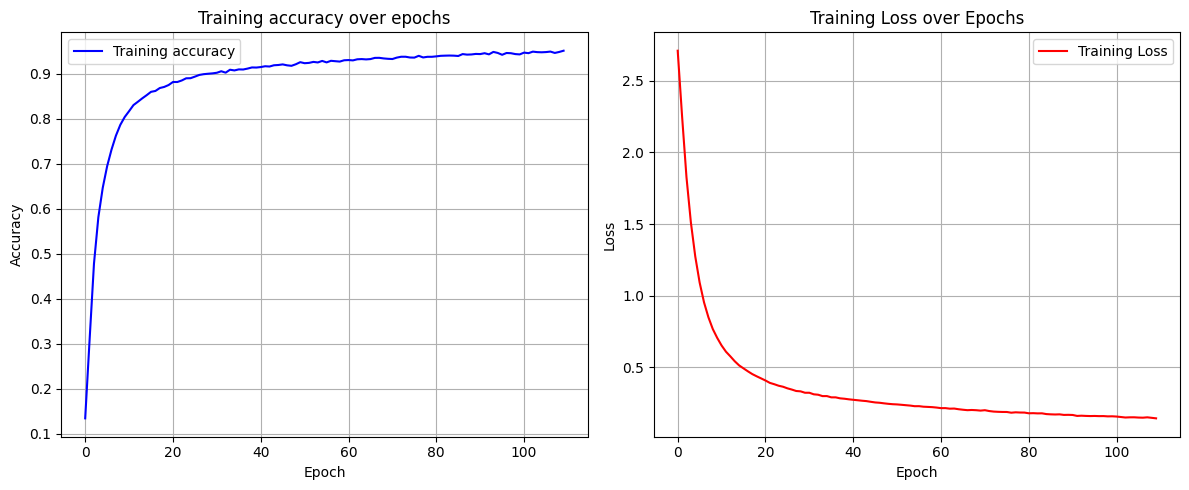

In [23]:
#Accuracy

plt.figure(figsize =(12, 5))  #This helpa me sets the size of the plot
plt.subplot(1, 2, 1)          #Dfininig a subplot inside the main figure
plt.plot(history.history["accuracy"], label = "Training accuracy", color = "blue")
plt.title("Training accuracy over epochs")     #Overall title of the graph
plt.xlabel("Epoch")              #The title of my x label
plt.ylabel("Accuracy")          #The title of mu y label
plt.legend()                   #Helps me display the label for the accuracy line
plt.grid(True)                  #Adds a gird to the graph for better visuality


#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

 #how the plots
plt.tight_layout()
plt.show()

My model accuracy appeared to be stable around 40th epoch, then there were little rise afterwords. This appears to be
a very good learning but we never can tell, maybe my model has just learned all the patterns in the training dataset.
The training loss was also decreasing over time.


What this could mean:
Perfect accuracy on training data and low loss is great, but…

This usually signals overfitting, especially if you're not seeing validation metrics.


Let’s confirm that MAMA is not just memorizing but actually generalizing. Here's how to modify my model training to include validation:

In [24]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,  # Adds validation (20% of training data)
    verbose=1
)


Epoch 1/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0772 - val_accuracy: 0.8957 - val_loss: 0.2957
Epoch 2/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0795 - val_accuracy: 0.8867 - val_loss: 0.3173
Epoch 3/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0817 - val_accuracy: 0.8873 - val_loss: 0.3226
Epoch 4/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0774 - val_accuracy: 0.8867 - val_loss: 0.3228
Epoch 5/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0743 - val_accuracy: 0.8813 - val_loss: 0.3380
Epoch 6/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0737 - val_accuracy: 0.8831 - val_loss: 0.3376
Epoch 7/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0704 - val_accuracy: 0.8734 - val_loss: 0.3483
Epoch 8/200
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0719 - val_accu

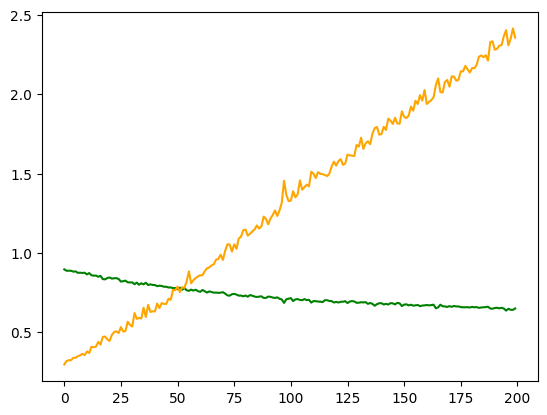

In [26]:
# Add validation accuracy and loss to your plots
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
# and
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')


INTERPRETATION OF GRAPH

#GREEN LINE : Right before 1.0 and was slightly droppingACROSSS ALL EPOCH. It means my model is overfitting

YELLO LINE: Which is my validation loss also approves this, it kept going up across all epoch which is usually a sign of overfitting

This suggests the model is starting to memorize training data rather than generalizing well to unseen data.



Now, i will make MAMA train smarter and not harder
I will use a "Dropout", which would help me randonmly deactivate neurons during training to prevent memorization, and using EarlyStopping too

In [27]:
#Getting vocab size
vocab_size = len(tokenizer.word_index) + 1   #Here i am using +1 to account for the OOV token
num_classes = len(label_encoder.classes_)

#Declaring Early Stopping
early_stop = EarlyStopping(    
    monitor = "val_loss",    #This will monitor the "val_loss"
    patience = 3,            #I am giving it a patience of 3, which ,means if loss doesnt improve after 3 consecutive loss, then stop
    restore_best_weights = True     #Then help me pick the best performance out of that 3
)

#Define the model
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 16, input_length = max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation ="relu"),
    Dropout(0.5),                                #This is where i added the dropout, 50 percent of the neurons will be cut off to avoid over-reliance
    Dense(num_classes, activation = "softmax")
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


history = model.fit(
    x_train,
    y_train,
    epochs = 110,      #Number of times it repeats training
    batch_size = 8,   #The number of chunks of data it inputs into the model at once
    callbacks = [early_stop],   #Fitting in my Early_stop
    verbose = 1       #To help me show a progress bar while training
)
    


#Sequential is a simple stakc of layers, where each layer passes data on to the next
#Embeddings transform words represented by integers into meaningful word vectors
#GlobalAveragePooling1d will convert sentences into average, and not just focus on one word but the genrral idea
#Dense is a fully connected layer to previous layers, that learns pattern and then make prediction with 16 neurons
#input_dim is how many unique values should it expect
#output_dim is the size of the vector each word will be converted into
#input_length is the length of each sentence after i did the padding
#relu is to keep only positive values, Rectified Linear Unit
#num_classes means one neuron for each intent category
#activation softmax helps me turn the output into probabilities, like 80% chance it is "need"
#loss='sparse_categorical_crossentropy': Good for multi-class classification when labels are integers.
#optimizer='adam': A popular algorithm that adjusts the model as it learns.
#metrics=['accuracy']: We’ll keep track of how often it gets the intent right


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0890 - loss: 2.7588
Epoch 2/110
  85/1037 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1836 - loss: 2.5853

C:\Users\WAJI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1860 - loss: 2.5068
Epoch 3/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2886 - loss: 2.1483
Epoch 4/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3389 - loss: 1.9635
Epoch 5/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4026 - loss: 1.7977
Epoch 6/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4502 - loss: 1.6744
Epoch 7/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4761 - loss: 1.5896
Epoch 8/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5050 - loss: 1.4951
Epoch 9/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5259 - loss: 1.4377
Epoch 10/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5480 - loss: 1.3698
Epoch 11/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5574 - loss: 1.3214
Epoch 12/110
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5727 - loss: 1.2681
Epoch 13/110
1037/1037 ━━━━━━━

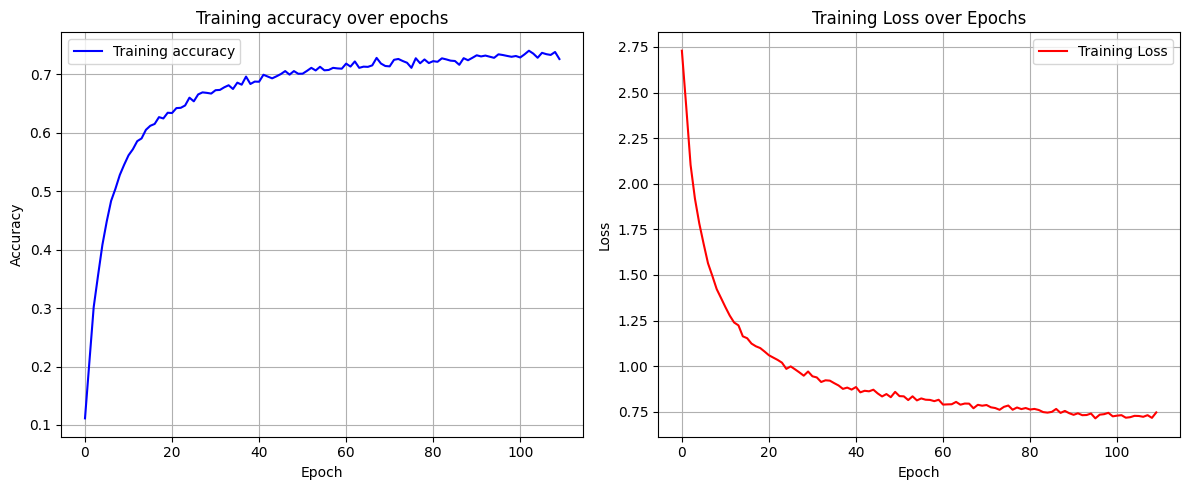

In [28]:


#Accuracy

plt.figure(figsize =(12, 5))  #This helpa me sets the size of the plot
plt.subplot(1, 2, 1)          #Dfininig a subplot inside the main figure
plt.plot(history.history["accuracy"], label = "Training accuracy", color = "blue")
plt.title("Training accuracy over epochs")     #Overall title of the graph
plt.xlabel("Epoch")              #The title of my x label
plt.ylabel("Accuracy")          #The title of mu y label
plt.legend()                   #Helps me display the label for the accuracy line
plt.grid(True)                  #Adds a gird to the graph for better visuality


#loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

 #how the plots
plt.tight_layout()
plt.show()

Wow, the graph does not appear consistent, well, let me see for validation accuracy, let me split my data into 2 and see if i has stopped generalizing

In [29]:
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.2,  #Where 20 percent of the data will be used for validation
    epochs = 110,
    batch_size = 8,
    verbose = 1
    
)

Epoch 1/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7646 - loss: 0.6402 - val_accuracy: 0.8228 - val_loss: 0.5230
Epoch 2/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7678 - loss: 0.6372 - val_accuracy: 0.8029 - val_loss: 0.5640
Epoch 3/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7574 - loss: 0.6466 - val_accuracy: 0.7981 - val_loss: 0.5794
Epoch 4/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7688 - loss: 0.6194 - val_accuracy: 0.8107 - val_loss: 0.5787
Epoch 5/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7671 - loss: 0.6281 - val_accuracy: 0.7908 - val_loss: 0.6238
Epoch 6/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7764 - loss: 0.6145 - val_accuracy: 0.8047 - val_loss: 0.5751
Epoch 7/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7798 - loss: 0.5965 - val_accuracy: 0.8149 - val_loss: 0.5781
Epoch 8/110
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7625 - loss: 0.6273 - val_accu

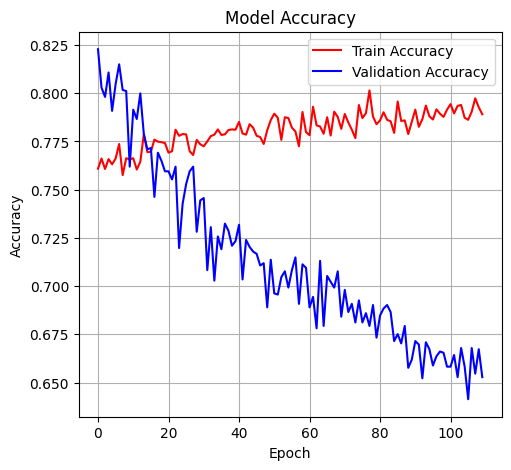

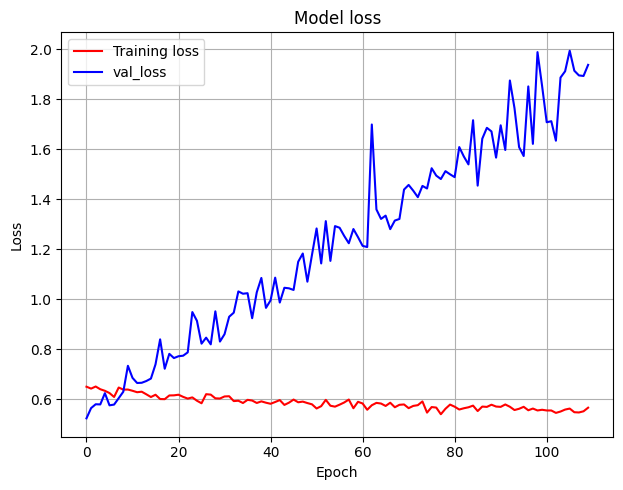

In [30]:
#MY PLOT FOR VALIDATION AND ACCURACY VALUES

plt.figure(figsize =(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Train Accuracy", color = "red")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy", color = "blue")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


#MY PLOT FOR TRAINING LOSS  AND VALIDATION LOSS
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "Training loss", color = "red")
plt.plot(history.history["val_loss"], label = "val_loss", color = "blue")
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

INTEPRETATION

THE FIRST GRAPH

The red line which is for the Training Accuracy remains up there even though it was fluctuating but it is still a good performance overall, because it was 
up there through all epochs

The BLUE line which is my Validation Accuracy, kept dropping down drstaically which shows that my model has memorized all the training data and now its
performance is very bad and dropping down on unseen data throughout the epochs.


THE SECOND GRAPH

For loss, we always expect our loss to be going down

The RED line which is MAMA's Training loss, was going down throughout the epoch even though it appears to be fluctuating, but overall, it was going down

The BLUE line which is MAMA's validation loss, kept going up after every epoch, which again means the model is not doinng well on unseen data

Now, at this stage, before procedding to use other techniques like Early Stopping to increase Validation performance, My model could be performing so bad
probably because of the small dataset, so rigght now, what i am going to do is gather more dataset and then work on that again